Técnicas
1 - Remoción
2 - Binarización
3 - Escalamiento
4 - Normalizacion L1
5 - Normalizacion L2
Que técnica desea realizar? 2

- Binarización - 

El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %
El acc de clasificacion es del  46.6666666667 %


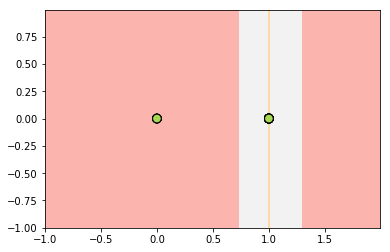

In [16]:
# importar los datos desde texto plano separado por comas

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn import cross_validation

from numpy import linalg as LA

# Datos de archivo
# archivo_entrada = 'Data.txt' 
# datos = np.loadtxt(archivo_entrada, delimiter=',') 
# Si le etiqueta esta en la primera posicion 
# X,y = datos[:, 1:], datos[:, 0]

# Importar data de sklearn
iris = datasets.load_iris()
X = iris.data[:,[0,1]]
y = iris.target

# Separar los datos de entranamiento y los de test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2, random_state=3)


# Tecnica de remoción
def remocion_train(X) :
    X = X - X.mean(axis=0)
    X = X/X.std(axis=0)

    return X

def remocion_test(X_test) :
    media = X_train.mean(axis=0)
    desviacion = X_train.std(axis=0)

    X_test = X_test - media
    X_test = X_test/desviacion

    return X_test

# Tecnica de Binarizacion
def binarizacion(X,gamma) :
    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]

    for i in range(filas) :
        for j in range(columnas) :
            X[i][j] = 1 if X[i][j] >= gamma else 0

    return X

# Tecnica de Escalamiento
def escalamiento(X) :
    X = X - X.min(axis=0)
    X = X/(X.max(axis=0) - X.min(axis=0))

    return X

# normalizacion l1
def normalizacion_uno(X) :
    norm = LA.norm(X, ord=1, axis=1)

    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]

    for i in range(filas) :
        X[i][:] =  X[i][:] / norm[i]
    return X

# normalizacion l2
def normalizacion_dos(X) :
    norm = LA.norm(X, ord=2, axis=1)

    filas = np.shape(X)[0]
    columnas = np.shape(X)[1]

    for i in range(filas) :
        for j in range(columnas) :
            X[i][j] =  X[i][j] / norm[i]
    return X

def graficar_clasificador(clasificador, X, y):
    # definimos valores máximos y mínimos de la malla que vamos a graficar
    min_x, max_x = X[:,0].min() - 1.0 , X[:,0].max() + 1.0
    min_y, max_y = X[:,1].min() - 1.0 , X[:,1].max() + 1.0
    
    paso = 0.01
    
    x_vals, y_vals = np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    
    # corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    resultados = resultados.reshape(x_vals.shape)
    
    
    plt.figure()
    plt.pcolormesh(x_vals, y_vals, resultados, cmap=plt.cm.Pastel1)
    plt.scatter(X[:,0], X[:,1],c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Set2 )
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.show()
    

def resultados_clasficador(x_train_norm, x_test_norm) :
    valores_de_c =[ 1,10,100,200,300,450,550,800,950,1000]
    
    for c in valores_de_c :
        clasificador =  GaussianNB()
        clasificador.fit(x_train_norm, y_train)
        y_pred = clasificador.predict(x_test_norm)
        iguales = (y_test != y_pred).sum()
        porcentaje = (iguales/45)*100
        
        acc = 100.0*(y_pred == y_test).sum()/x_test_norm.shape[0]
        print('El acc de clasificacion es del ', acc, '%')
       # print('C = %d - muestras iguales %d/%d - Porcentaje: %d ' %(c, iguales, len(y_pred), porcentaje))
    
    graficar_clasificador(clasificador, x_test_norm, y_test)

print("Técnicas\n1 - Remoción\n2 - Binarización\n3 - Escalamiento\n4 - Normalizacion L1\n5 - Normalizacion L2")
tecnica = int(input('Que técnica desea realizar? '))

if tecnica == 1:
    print('\n- Remoción - \n')
    x_train_norm = remocion_train(X_train)
    x_test_norm = remocion_test(X_test)
elif tecnica == 2:
    print('\n- Binarización - \n')
    gamma = ( X_train.min() + X_train.max())/2
    x_train_norm =  binarizacion(X_train, gamma)
    x_test_norm =  binarizacion(X_test, gamma)
elif tecnica == 3:
    print('\n- Escalamiento - \n')
    x_train_norm = escalamiento(X_train)
    x_test_norm = escalamiento(X_test)
elif tecnica == 4:
    print('\n- Normalizacion L1 - \n')
    x_train_norm = normalizacion_uno(X_train)
    x_test_norm = normalizacion_uno(X_test)
elif tecnica == 5:
    print('\n- Normalizacion L2 - \n')
    x_train_norm = normalizacion_dos(X_train)
    x_test_norm = normalizacion_dos(X_test)

    
    
resultados_clasficador(x_train_norm, x_test_norm)




